In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

In [410]:
df = pd.read_csv('data06.csv', delimiter = ';', names = ['I', 'II', 'classification'])
df

,I,II,classification
0,0.009,0.933,0
1,0.948,0.108,1
2,0.178,0.201,0
3,0.663,0.379,1
4,0.712,0.279,1
...,...,...,...
95,0.147,0.471,0
96,0.620,0.568,1
97,0.137,0.759,0
98,0.070,0.492,0


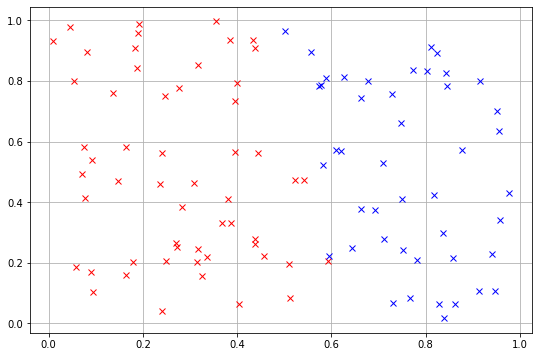

In [411]:
plt.subplots(figsize = (9, 6))
plt.plot(df[df['classification'] == 0]['I'], df[df['classification'] == 0]['II'], 'bx', color = 'red')
plt.plot(df[df['classification'] == 1]['I'], df[df['classification'] == 1]['II'], 'bx')
plt.grid()
plt.show()

In [412]:
X = [[float(df['I'][i]), float(df['II'][i])] for i in range(len(df))]
x_train, x_test, y_train, y_test = train_test_split(X, df['classification'].values, train_size = 0.75)
model = Perceptron().fit(x_train, y_train)
y_pred = model.predict(x_test)

In [413]:
pd.DataFrame({'true': y_test, 'predicted': y_pred})

,true,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,1,1
6,0,0
7,1,1
8,1,1
9,1,1


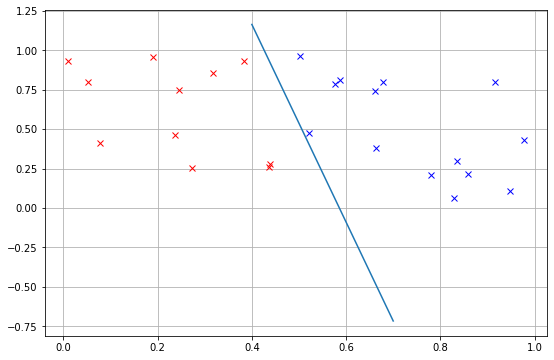

accuracy =  0.96


In [414]:
def f(x):
    return -(x*model.coef_[0][0] + model.intercept_[0])/model.coef_[0][1]

def points(x, y, caterogy):
    resx, resy = [], []
    for i in range(len(x)):
        if y[i] == caterogy:
            resx.append(x[i][0])
            resy.append(x[i][1])
    return resx, resy

plt.subplots(figsize = (9, 6))
plt.plot(points(x_test, y_pred, 0)[0], points(x_test, y_pred, 0)[1], 'bx', color = 'red')
plt.plot(points(x_test, y_pred, 1)[0], points(x_test, y_pred, 1)[1], 'bx')
x = np.linspace(0.4, 0.7)
plt.plot(x, f(x))
plt.grid()
plt.show()
print('accuracy = ', accuracy_score(y_pred, y_test))

Part 2

In [389]:
df2 = pd.read_csv('heart.csv', delimiter = ',')
df2 = df2.rename(columns = {'cp':'chest pain type', 
                             'trestbps':'resting blood pressure',
                             'chol': 'serum cholestoral in mg/dl', 
                             'fbs':'fasting blood sugar > 120 mg/dl',
                             'restecg':'resting electrocardiographic results', 
                             'thalach':'maximum heart rate achieved',
                             'exang':'exercise induced angina', 
                             'oldpeak':'ST depression induced by exercise relative to rest',
                             'slope':'the slope of the peak exercise ST segment', 
                             'ca':'number of major vessels colored by flourosopy'})
df2

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment,number of major vessels colored by flourosopy,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


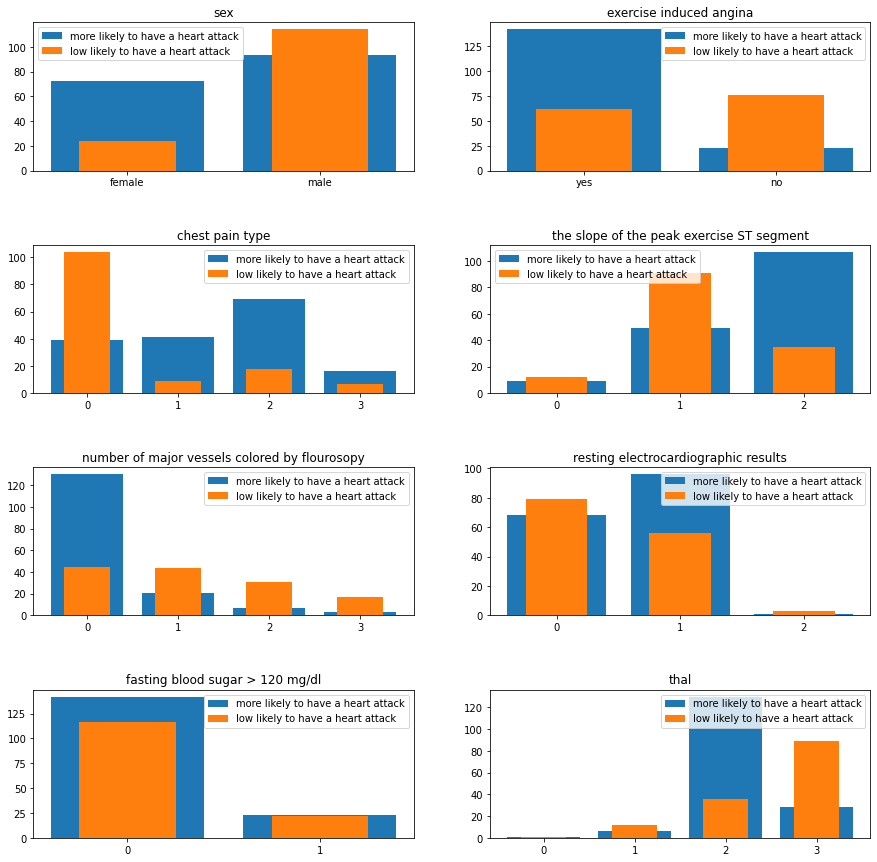

In [390]:
df2_1, df2_0 = df2[df2['target'] == 1], df2[df2['target'] == 0]
category_variables = ('chest pain type', 'the slope of the peak exercise ST segment',
                      'number of major vessels colored by flourosopy', 'resting electrocardiographic results',
                     'fasting blood sugar > 120 mg/dl', 'thal')
plt.figure(figsize = (15, 15))
plt.subplot(4, 2, 1)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
x = ['female', 'male']
plt.title('sex')
plt.bar(x, [len(df2_1[df2_1['sex'] == k]) for k in (0, 1)], label = 'more likely to have a heart attack')
plt.bar(x, [len(df2_0[df2_0['sex'] == k]) for k in (0, 1)], width = 0.5, label = 'low likely to have a heart attack')
plt.legend()
plt.subplot(4, 2, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
x = ['yes', 'no']
plt.title('exercise induced angina')
plt.bar(x, [len(df2_1[df2_1['exercise induced angina'] == k]) for k in (0, 1)], 
        label = 'more likely to have a heart attack')
plt.bar(x, [len(df2_0[df2_0['exercise induced angina'] == k]) for k in (0, 1)], width = 0.5, 
        label = 'low likely to have a heart attack')
plt.legend()
for i in range(len(category_variables)):
    plt.subplot(4, 2, i + 3)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    x = ['0', '1', '2', '3']
    plt.title(category_variables[i])
    y_1 = [len(df2_1[df2_1[category_variables[i]]==k]) for k in range(4)]
    y_0 = [len(df2_0[df2_0[category_variables[i]]==k]) for k in range(4)]
    if (y_1[-1] == 0 and y_1[-2] == 0) or (y_0[-1] == 0 and y_0[-2] == 0):
        plt.bar(x[:-2], y_1[:-2], label = 'more likely to have a heart attack')
        plt.bar(x[:-2], y_0[:-2], width = 0.5, label = 'low likely to have a heart attack')
    elif y_1[-1] == 0 or y_0[-1] == 0:
        plt.bar(x[:-1], y_1[:-1], label = 'more likely to have a heart attack')
        plt.bar(x[:-1], y_0[:-1], width = 0.5, label = 'low likely to have a heart attack')
    else:
        plt.bar(x, y_1, label = 'more likely to have a heart attack')
        plt.bar(x, y_0, width = 0.5, label = 'low likely to have a heart attack')
    plt.legend()

In [391]:
df2 = df2[(df2['thal'] > 0) & (df2['resting electrocardiographic results'] < 2)].copy()

In [392]:
if not df2.isnull().any().any(): 
    print('No missing data')

No missing data


In [393]:
df2_norm = df2.copy()
quantitative_variables = ['age', 'resting blood pressure', 'serum cholestoral in mg/dl', 'maximum heart rate achieved', 
                          'ST depression induced by exercise relative to rest']
s = StandardScaler().fit_transform(df2.loc[:, quantitative_variables])
df2_norm[quantitative_variables] = StandardScaler().fit_transform(df2[quantitative_variables])
df2_norm

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment,number of major vessels colored by flourosopy,thal,target
0,0.960624,1,3,0.773322,-0.257416,1,0,-0.002805,0,1.119202,0,0,1,1
1,-1.906766,1,2,-0.087750,0.071620,0,1,1.619575,0,2.168896,0,0,2,1
2,-1.465629,0,1,-0.087750,-0.818714,0,0,0.961853,0,0.331932,2,0,2,1
3,0.188634,1,1,-0.661798,-0.199351,0,1,1.224942,0,-0.192915,2,0,2,1
4,0.298919,0,0,-0.661798,2.084550,0,1,0.567220,1,-0.367864,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.298919,0,0,0.486298,-0.102575,0,1,-1.186704,1,-0.717762,1,0,3,0
299,-1.024492,1,3,-1.235846,0.342592,0,1,-0.792071,0,0.156983,1,0,3,0
300,1.512045,1,0,0.715917,-1.031620,1,1,-0.397438,0,2.081421,1,2,3,0
301,0.298919,1,0,-0.087750,-2.231635,0,1,-1.537489,1,0.156983,1,1,3,0


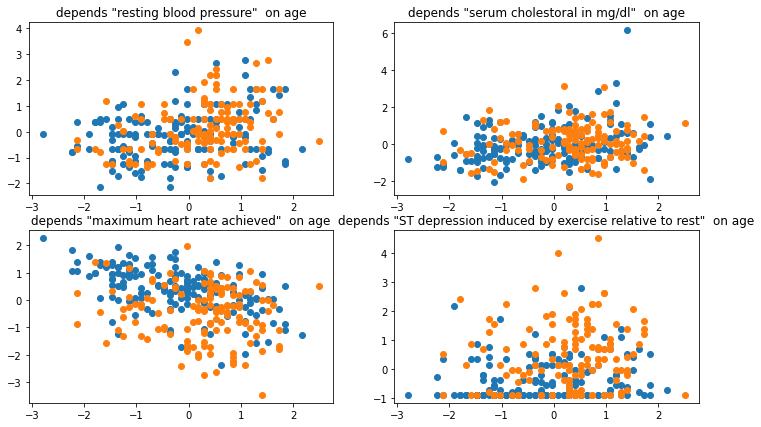

In [394]:
plt.figure(figsize=(12, 7))
for i in range(len(quantitative_variables[1:])):
    plt.subplot(2, 2, i + 1)
    plt.title(f'depends "{quantitative_variables[1:][i]}"  on age')
    plt.scatter(df2_norm[df2_norm['target'] == 1]['age'], df2_norm[df2_norm['target'] == 1][quantitative_variables[1:][i]])
    plt.scatter(df2_norm[df2_norm['target'] == 0]['age'], df2_norm[df2_norm['target'] == 0][quantitative_variables[1:][i]])

In [395]:
for title in quantitative_variables[1:]:
    df2_norm[title] = df2_norm[title].apply(lambda x: np.mean(abs(df2_norm[title])) if abs(x) > 3 else x)

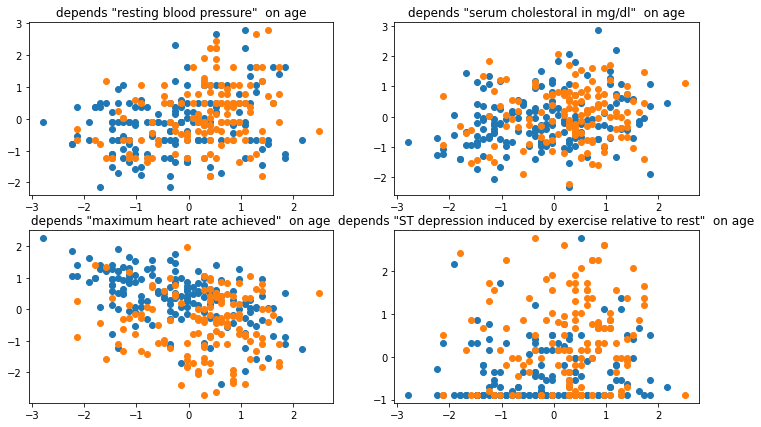

In [396]:
plt.figure(figsize=(12, 7))
for i in range(len(quantitative_variables[1:])):
    plt.subplot(2, 2, i + 1)
    plt.title(f'depends "{quantitative_variables[1:][i]}"  on age')
    plt.scatter(df2_norm[df2_norm['target'] == 1]['age'], df2_norm[df2_norm['target'] == 1][quantitative_variables[1:][i]])
    plt.scatter(df2_norm[df2_norm['target'] == 0]['age'], df2_norm[df2_norm['target'] == 0][quantitative_variables[1:][i]])

In [404]:
x_train, x_test, y_train, y_test = train_test_split(df2_norm[['age', 'sex', 'chest pain type', 'resting blood pressure',
                                                         'serum cholestoral in mg/dl', 'fasting blood sugar > 120 mg/dl',
                                                         'resting electrocardiographic results', 
                                                         'maximum heart rate achieved',
                                                         'exercise induced angina', 
                                                         'ST depression induced by exercise relative to rest',
                                                         'the slope of the peak exercise ST segment', 
                                                         'number of major vessels colored by flourosopy', 'thal']].values, 
                                                    df2_norm['target'].values, train_size = 0.85)

In [398]:
clf = MLPClassifier(solver = 'sgd', hidden_layer_sizes = (104, 52), max_iter = 1000).fit(x_train, y_train)
y_pred = clf.predict(x_test)
pd.DataFrame({'true': y_test, 'predicted': y_pred})
print('accuracy = ', accuracy_score(y_test, y_pred))

accuracy =  0.8222222222222222
